# Iris classification

## About Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.compose import make_column_transformer
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [96]:
data = pd.read_csv("/content/Iris.csv")

In [97]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [98]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<ipython-input-101-c0a26ca120da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = 'viridis')


<Axes: >

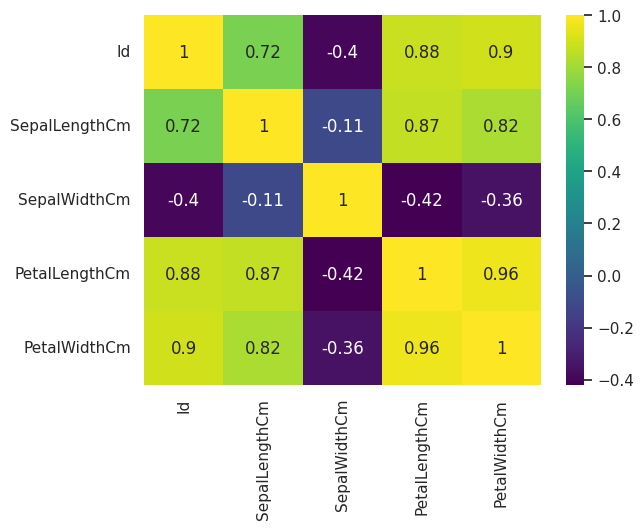

In [101]:
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

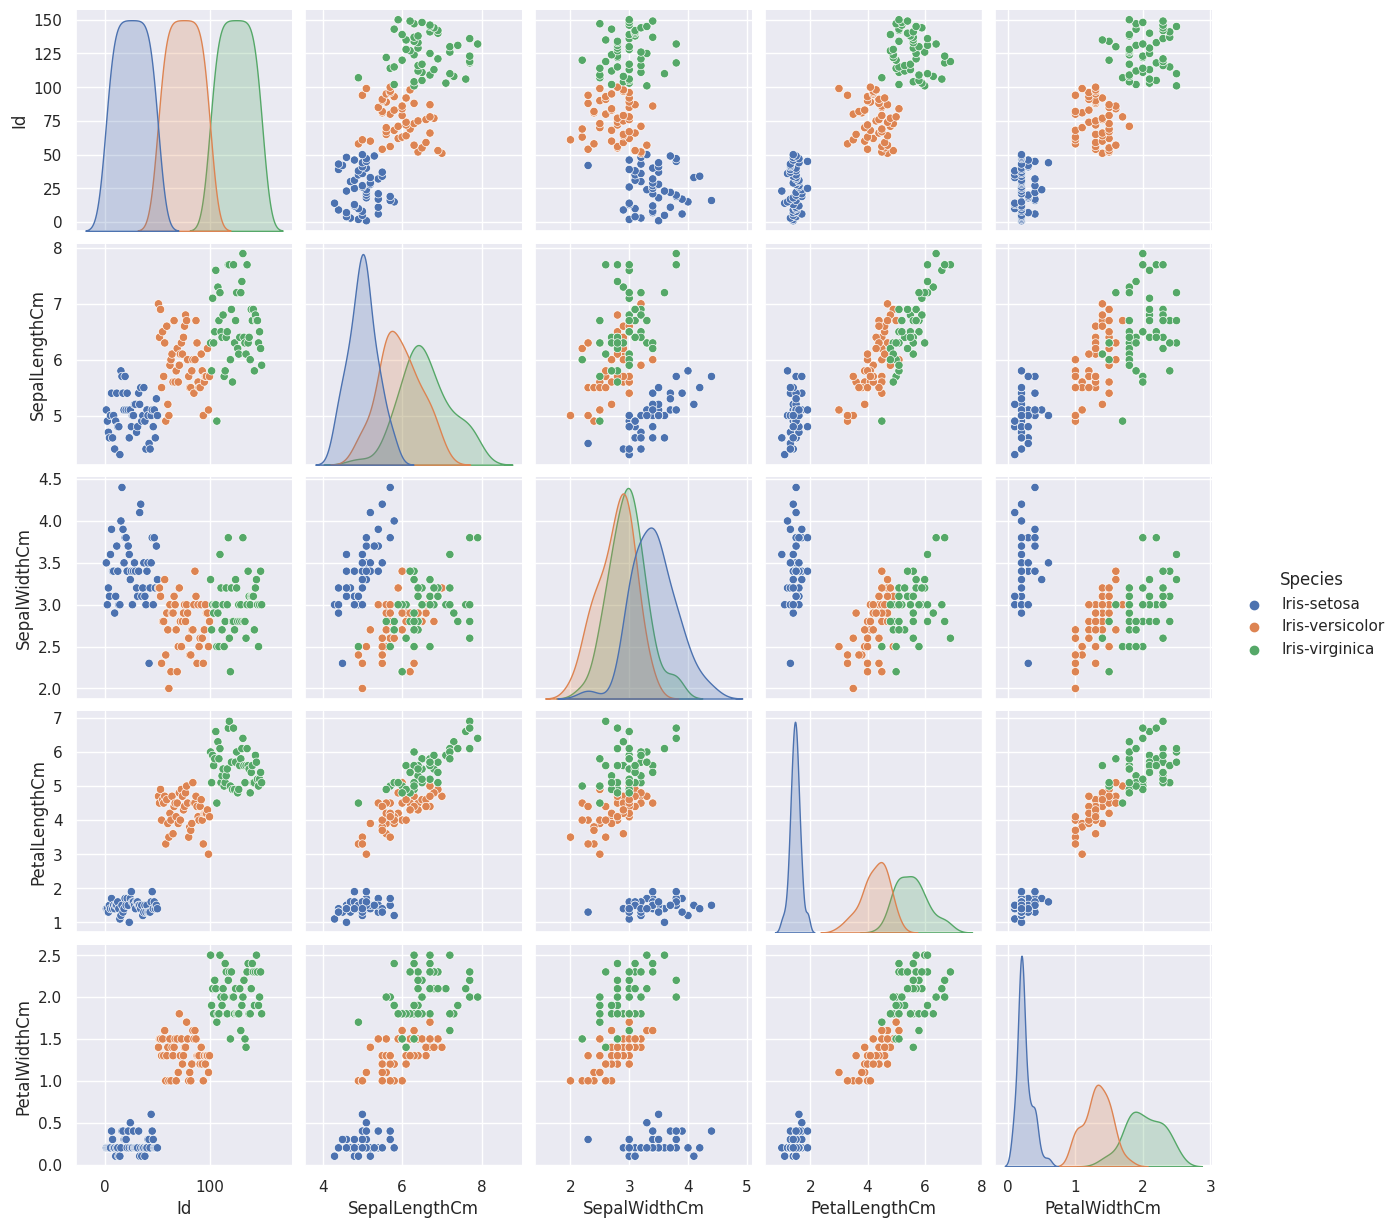

In [102]:
sns.pairplot(data, hue = 'Species')

<Axes: xlabel='Species', ylabel='count'>

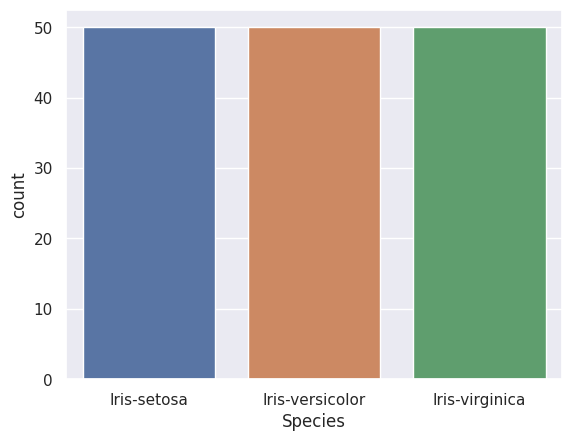

In [103]:
sns.countplot(data = data, x = data.Species)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [105]:
data.Species.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}, inplace = True)

In [106]:
X = data.iloc[:, 1:5]
y = data.Species

In [107]:
y.unique()

array([0, 1, 2])

In [108]:
X.info(), y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(None,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: Species, Length: 150, dtype: int64)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 46 to 119
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   SepalWidthCm   120 non-null    float64
 2   PetalLengthCm  120 non-null    float64
 3   PetalWidthCm   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [111]:
ct = MinMaxScaler()
ct.fit(X_train)
X_test_norm = ct.transform(X_test)

In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 46 to 119
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  120 non-null    float64
 1   SepalWidthCm   120 non-null    float64
 2   PetalLengthCm  120 non-null    float64
 3   PetalWidthCm   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [113]:
model_0 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", KNeighborsClassifier())
])
model_0.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', KNeighborsClassifier())])

In [114]:
KNN = model_0.score(X_test, y_test)

In [115]:
model_1 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", RandomForestClassifier())
])
model_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', RandomForestClassifier())])

In [116]:
RFC = model_1.score(X_test, y_test)

In [117]:
model_2 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", AdaBoostClassifier())
])
model_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', AdaBoostClassifier())])

In [118]:
ABC = model_2.score(X_test, y_test)

In [119]:
model_3 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", GradientBoostingClassifier())
])
model_3.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', GradientBoostingClassifier())])

In [120]:
GBC = model_3.score(X_test, y_test)

In [121]:
model_4 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", LogisticRegression())
])
model_4.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', LogisticRegression())])

In [122]:
LR = model_4.score(X_test, y_test)

In [123]:
model_5 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", SGDClassifier())
])
model_5.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', SGDClassifier())])

In [124]:
 SGD = model_5.score(X_test, y_test)

In [125]:
model_6 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", GaussianNB())
])
model_6.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', GaussianNB())])

In [126]:
GNB = model_6.score(X_test, y_test)

In [127]:
model_7 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", BernoulliNB())
])
model_7.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', BernoulliNB())])

In [128]:
BNB = model_7.score(X_test, y_test)

In [129]:
model_8 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", DecisionTreeClassifier())
])
model_8.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', DecisionTreeClassifier())])

In [130]:
DTC = model_8.score(X_test, y_test)

In [131]:
model_9 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", MLPClassifier(alpha = 0.001))
])
model_9.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', MLPClassifier(alpha=0.001))])

In [132]:
MLP = model_9.score(X_test, y_test)

In [133]:
model_10 = Pipeline([
    ("preprocessing", make_column_transformer(
        (MinMaxScaler(), [0, 1, 2, 3]),
    )),
    ("model", SVC())
])
model_10.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3])])),
                ('model', SVC())])

In [134]:
SVM = model_10.score(X_test, y_test)

In [135]:
d = [KNN, RFC, ABC, GBC, LR, SGD, GNB, BNB, DTC, MLP, SVM]
d

[1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.8333333333333334,
 1.0,
 0.3333333333333333,
 1.0,
 0.9333333333333333,
 1.0]

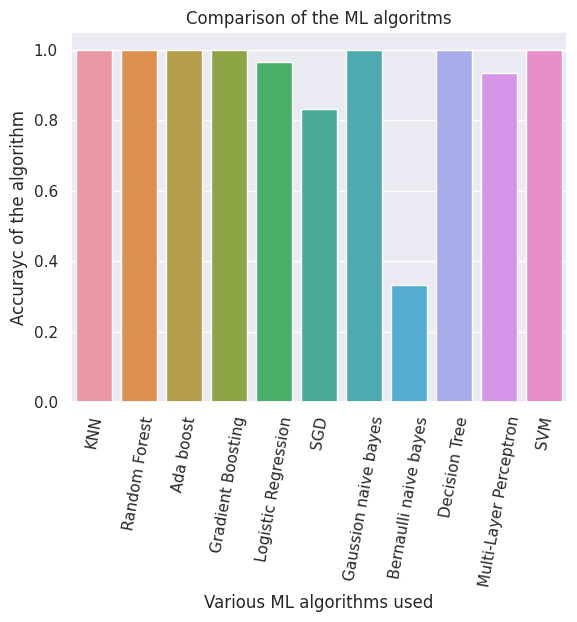

In [136]:
sns.set_theme()
sns.barplot(y = [KNN, RFC, ABC, GBC, LR, SGD, GNB, BNB, DTC, MLP, SVM], x = ['KNN', 'Random Forest', 'Ada boost', 'Gradient Boosting', 'Logistic Regression', 'SGD', 'Gaussion naive bayes', 'Bernaulli naive bayes', ' Decision Tree', 'Multi-Layer Perceptron', 'SVM'])
plt.xticks(rotation = 80)
plt.xlabel("Various ML algorithms used")
plt.ylabel("Accurayc of the algorithm")
plt.title("Comparison of the ML algoritms");

## Evaluation of the best ML algorithm(MLP)

In [142]:
cfm = confusion_matrix(y_true = y_test, y_pred = model_1.predict(X_test))

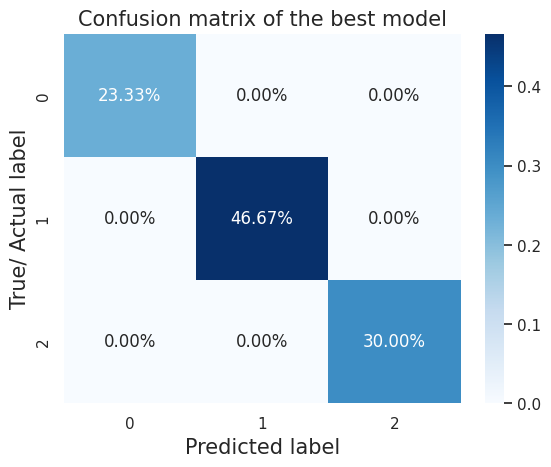

In [143]:
sns.heatmap(cfm/np.sum(cfm), fmt = '0.2%', annot = True, cmap = 'Blues')
plt.title("Confusion matrix of the best model", fontsize = 15)
plt.xlabel("Predicted label", fontsize = 15)
plt.ylabel("True/ Actual label", fontsize = 15);

In [144]:
accuracy = accuracy_score(y_true=y_test, y_pred = model_9.predict(X_test))
precision = precision_score(y_true=y_test, y_pred = model_9.predict(X_test), average = 'weighted')
recall = recall_score(y_true=y_test, y_pred = model_9.predict(X_test), average = 'weighted')
f1 = f1_score(y_true=y_test, y_pred = model_9.predict(X_test), average = 'weighted')

In [145]:
accuracy, precision, recall, f1

(0.9333333333333333,
 0.9454545454545454,
 0.9333333333333333,
 0.9341025641025641)

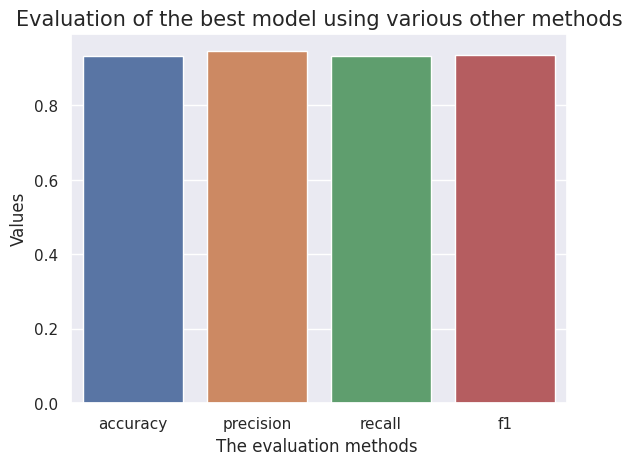

In [146]:
sns.barplot(y = [accuracy, precision, recall, f1], x = ['accuracy', 'precision', 'recall', 'f1'])
plt.title("Evaluation of the best model using various other methods", fontsize = 15)
plt.ylabel("Values")
plt.xlabel("The evaluation methods ");